The quality and management standards of bank loans play a crucial role in the modern economy [1, 2]. Given that loans entail inherent risks for financial institutions, creditors or investors typically conduct various risk assessments before each transaction to gauge the likelihood of timely repayment by borrowers [3]. Traditionally, commercial banks have relied on the 5C framework to subjectively evaluate the creditworthiness of borrowers [4]. This framework assesses borrowers across five dimensions: character, capacity, capital, collateral, and conditions. However, such evaluations often hinge on the subjective judgment of risk assessors, leaving room for internal fraud within banks' risk control mechanisms. With the dynamic nature of the market economy, this assessment approach no longer suffices to meet borrowers' needs or fulfill the risk management mandates of commercial banks. Therefore, there's a pressing need to establish a scientific and effective model for evaluating the creditworthiness of customers, aimed at minimizing default risks and maximizing profitability. For sustainable and robust global economic development, it's imperative for commercial banks to adopt a systematic and scientific credit risk management framework as the cornerstone of the economy [5].

# New Section

In [81]:
### Import Libraries

In [82]:
#Installing required package

!pip3 install h2o

In [83]:
!pip install Jinja2==3.0.0
!pip install eli5==0.12.0

In [84]:
import h2o
from dataprep.eda import create_report
from h2o.automl import H2OAutoML
from jinja2.filters import do_default
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
from scipy.stats.mstats import winsorize
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import normalize, RobustScaler
import io
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_regression
import pandas as pd
import statsmodels.api as sm
from pandas.testing import assert_frame_equal

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets, linear_model

from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.impute import SimpleImputer
import statistics

from jinja2.filters import do_default

from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from pandas.testing import assert_frame_equal
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
import shap


In [85]:
!pip install h2o
#create data report
!pip install dataprep


In [86]:
import h2o
from dataprep.eda import create_report
from h2o.automl import H2OAutoML
from jinja2.filters import do_default
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
from scipy.stats.mstats import winsorize
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import normalize, RobustScaler
import io
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_regression
import pandas as pd
import statsmodels.api as sm
from pandas.testing import assert_frame_equal

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets, linear_model

from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.impute import SimpleImputer
import statistics

from jinja2.filters import do_default

from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from pandas.testing import assert_frame_equal
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
import shap


In [87]:
!pip install shap

In [88]:
#FUNCTIONS

In [89]:
#Function 1 : cleanColumnNames

#Function defined to clean column names

In [90]:
def cleanColumnNames(df):
  #remove trailing and leading spaces
  df=df.rename(columns=lambda x :  x.strip())

  #remove extra spaces
  df.columns = df.columns.str.replace('  ',' ')

  #replace space with underscore
  df.columns=df.columns.str.replace(' ','_')

  #lowercase the column names
  df = df.rename(columns=lambda x: x.lower())

  return df


In [91]:
#Function 2 : null_information

#Function defined to obtain the null information the columns of a dataframe



In [92]:
#Find null stats

def null_information(df):
  df_columns = list(df.columns)

  for colname in df_columns:
    null_rows = df[colname].isnull().sum()
    total_rows = df[colname].count()
    percentage_nulls = round((null_rows/total_rows)*100,2)
    # print("\ncolumn name --> ", colname)
    # print( "null rows --> ", null_rows)
    # print( "total row count --> ", total_rows)
    # print( "percentage of null rows --> ", percentage_nulls,"")
    print(f"column : {colname} has {null_rows} null values ---> {percentage_nulls} % of nulls ")


In [93]:
#Function 3 : get_percent_missing

#This function is used to find the percentage of null values in the respective columns

In [94]:
#get percentage of missing null values
def get_percent_missing(dataframe):

    percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe),2)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [95]:
#function to add Nan/ null values
def fill_na(df,feature):
  print(feature)
  df_impute = pd.DataFrame(df[f'{feature}'])

  df_impute[f'{feature}_percent_1'] = df[f'{feature}']
  df_impute[f'{feature}_percent_5'] = df[f'{feature}']
  df_impute[f'{feature}_percent_10'] = df[f'{feature}']
  display(df_impute)

  #NULL VALUES BEFORE ADDING NaN
  print("PERCENTAGE OF NULL VALUES BEFORE ADDING Nan\n")
  df = get_percent_missing(df_impute)
  display(df)

  #ADDING 1 % Nan VALUES TO THE COLUMNS
  df_impute.loc[df_impute.sample(frac=0.01).index, f'{feature}_percent_1'] = pd.np.nan

  #ADDING 5 % Nan VALUES TO THE COLUMNS
  df_impute.loc[df_impute.sample(frac=0.05).index, f'{feature}_percent_5'] = pd.np.nan

  #ADDING 10 % Nan VALUES TO THE COLUMNS
  df_impute.loc[df_impute.sample(frac=0.1).index, f'{feature}_percent_10'] = pd.np.nan

  #NULL VALUES AFTER ADDING 1%, 5%, 10% NaN
  print("PERCENTAGE OF NULL VALUES AFTER ADDING Nan\n")
  df1 = get_percent_missing(df_impute)
  display(df1)

  return df_impute



In [96]:
#Function 9: prediction

#Function defined for Model Prediction

In [97]:
def prediction(X_train, X_test, y_train, y_test):
  # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MAE on training and testing data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print("Training MAE: ", train_mae)
    print("Testing MAE: ", test_mae)

    # Calculate the RMSE on the training and testing data
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print("\nTraining RMSE: ", train_rmse)
    print("Testing RMSE: ", test_rmse)

In [98]:
#READ THE DATA

READ THE DATA

In [99]:
url = '/content/application_data.csv'

In [100]:
df_original = pd.read_csv(url)

In [101]:
#Using the cleanColumnName function to clean the column names
df_original = cleanColumnNames(df_original)
df_original.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#Displays statistical information of the numeric columns
df_original.describe()


,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [103]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, sk_id_curr to amt_req_credit_bureau_year
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


EXPLORATORY DATA ANALYSIS

In [104]:
#Using Exploratory Data Analysis (EDA), we can analyze and investigate the data sets and summarize the required characteristics mainly through visualizations.

#PYTHON LIBRARIES USED:

#Seaborn
#Matplotlib
#Plotly

In [105]:
#checking null values
df_original.isnull().sum()

sk_id_curr                        0
target                            0
name_contract_type                0
code_gender                       0
flag_own_car                      0
                              ...  
amt_req_credit_bureau_day     41519
amt_req_credit_bureau_week    41519
amt_req_credit_bureau_mon     41519
amt_req_credit_bureau_qrt     41519
amt_req_credit_bureau_year    41519
Length: 122, dtype: int64

In [106]:
#Analysing the numeric variables through boxplot to obtain appropriate imputaion value

df_impute = df_original.copy()
df_impute.drop(['amt_req_credit_bureau_day','amt_req_credit_bureau_week'], axis=1, inplace=True)
plt.figure(figsize=(10,30))



<Figure size 1000x3000 with 0 Axes>

<Figure size 1000x3000 with 0 Axes>

In [107]:
#IMPUTATION
df_original_impt = df_original.copy()
#df_original_impt.info()
#df_original_impt.reset_index(inplace=True)
df_original_impt.groupby('amt_req_credit_bureau_day').apply(lambda group: group.interpolate(method= 'linear'))
df_original_impt
data_imputed=[]
numeric_columns = list(df_impute.columns)


<ipython-input-107-86ceab38532b>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_original_impt.groupby('amt_req_credit_bureau_day').apply(lambda group: group.interpolate(method= 'linear'))


In [108]:
print("Shree ganesha")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

app_var = pd.read_csv("/content/application_data.csv")
prev_app_var= pd.read_csv("/content/previous_application.csv")

Shree ganesha


In [109]:
app_var.head()

app_var.columns

app_var.shape #number of columns and rows

msng_calc = pd.DataFrame(app_var.isnull().sum().sort_values()).reset_index()       #calculate the missing values
msng_calc.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_calc.head()

msng_calc['msng_pct'] = msng_calc['null_count']/app_var.shape[0]*100
# msng_info.to_excel(r"D:\Learnerea\Tables\loan_default_data\missing_info.xlsx",index=False)
msng_calc.head()

msng_calc['msng_pct'] = msng_calc['null_count']/app_var.shape[0]*100  #calculate the ratio of missing values
msng_calc.head()

msng_calc

# import the missing data to excel


,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
...,...,...,...
117,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
118,NONLIVINGAPARTMENTS_MODE,213514,69.432963
119,COMMONAREA_MODE,214865,69.872297
120,COMMONAREA_AVG,214865,69.872297


<ipython-input-110-d9fb7ae32596>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagcorrdf['FLAG_OWN_CAR'] = flagcorrdf['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
<ipython-input-110-d9fb7ae32596>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagcorrdf['FLAG_OWN_REALTY'] = flagcorrdf['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

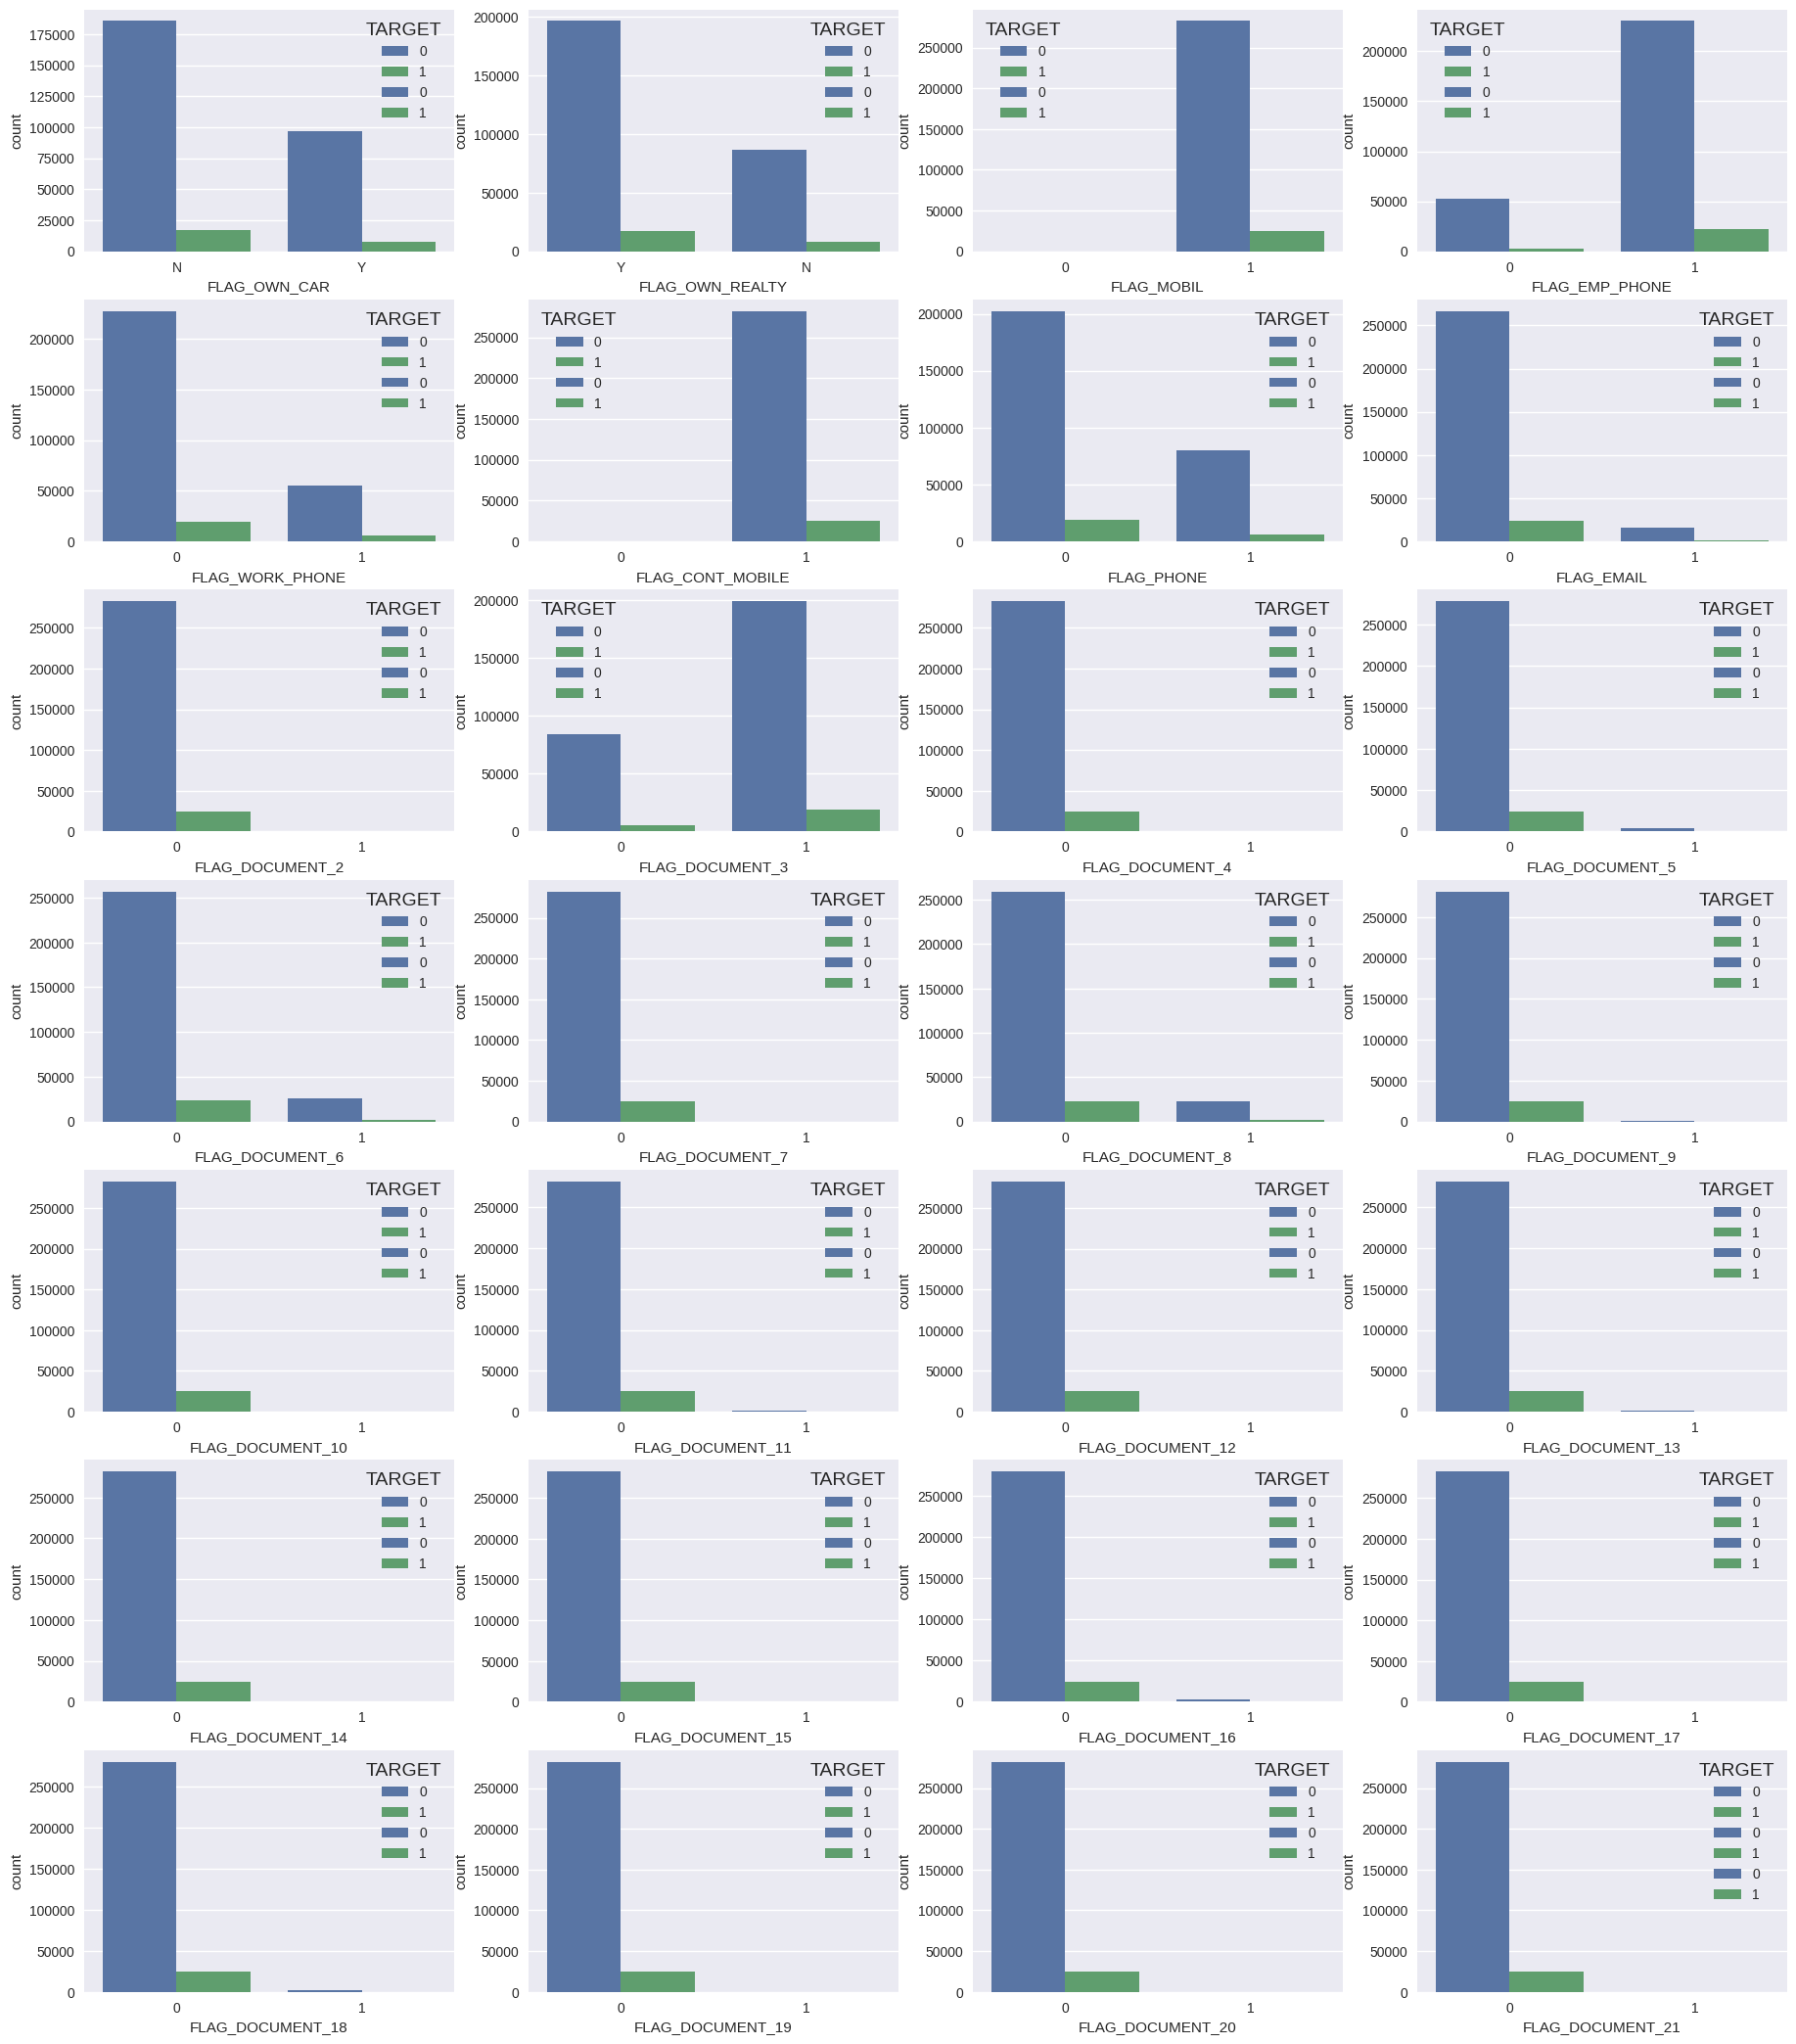

<Figure size 2000x2500 with 0 Axes>

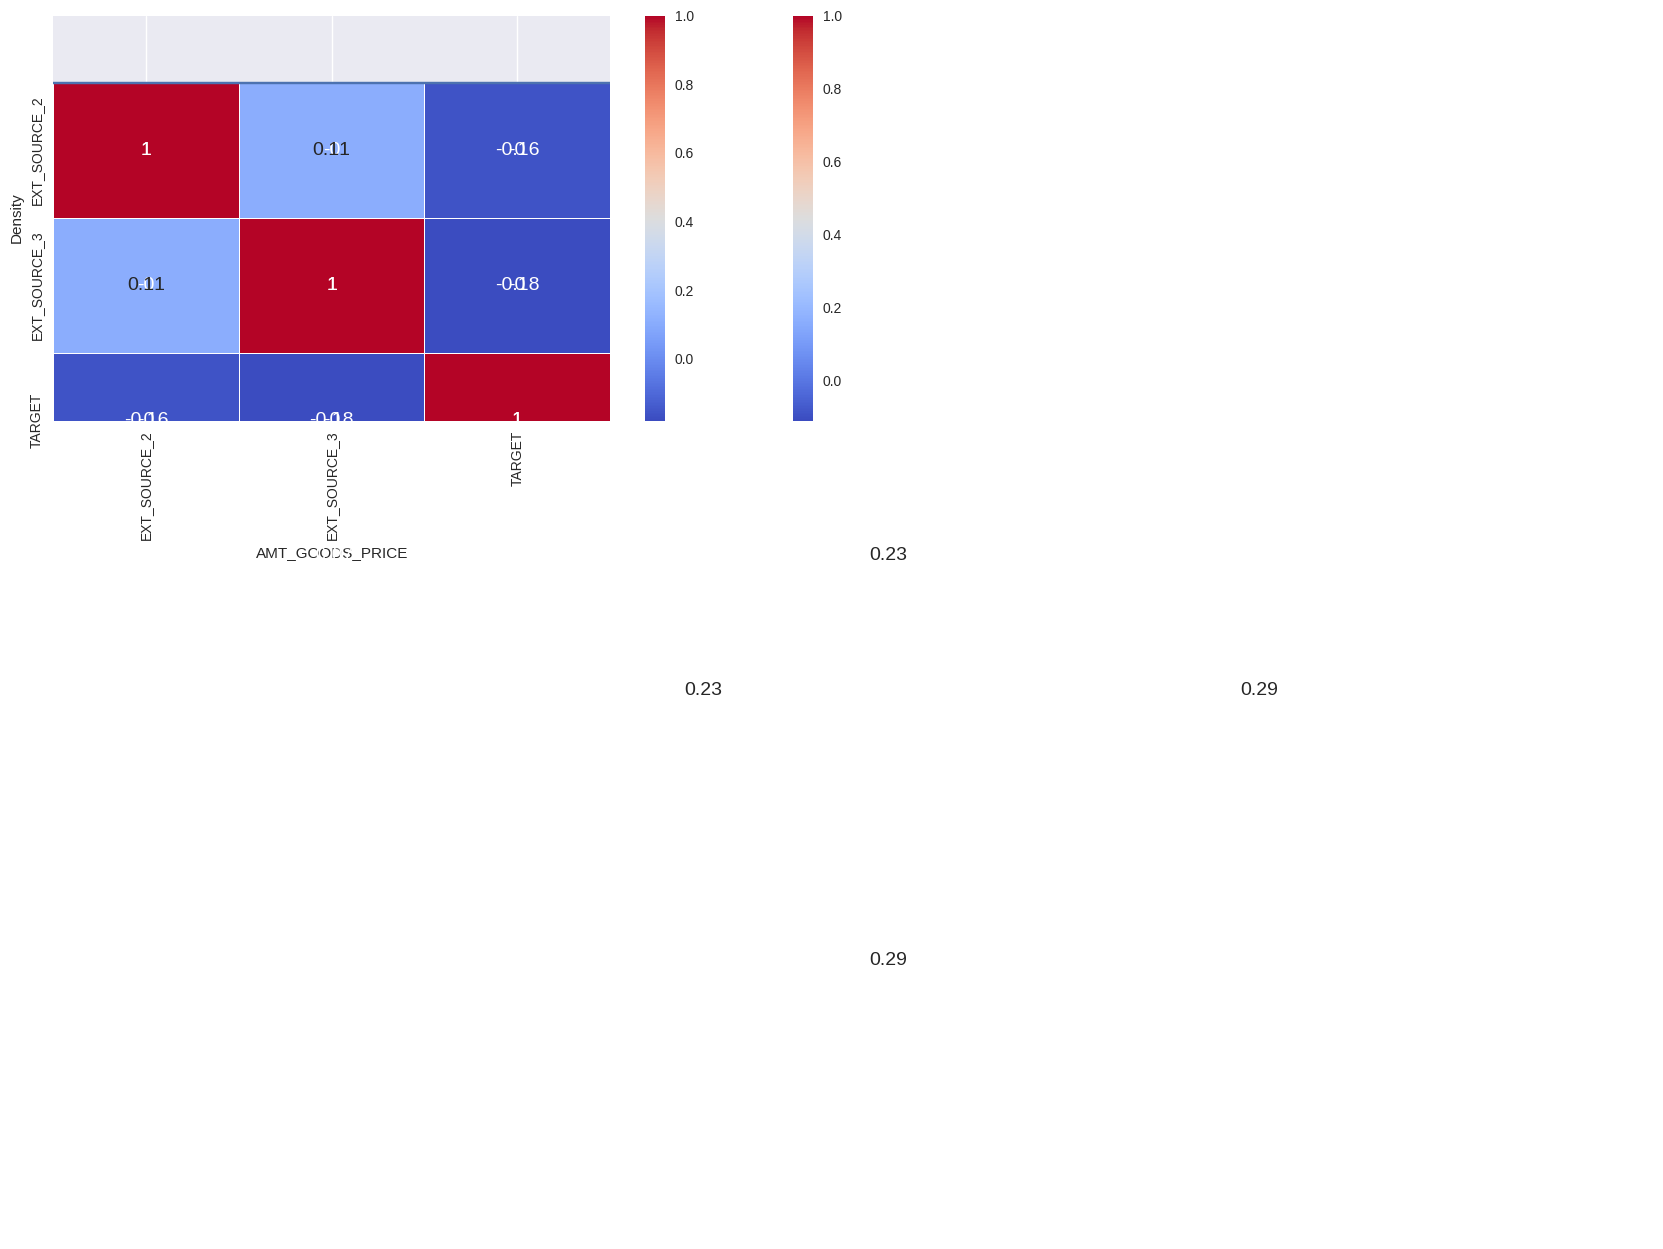

In [110]:
msng_calc = pd.DataFrame(app_var.isnull().sum().sort_values()).reset_index()       #calculate the missing values
msng_calc.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_calc.head()

msng_calc['msng_pct'] = msng_calc['null_count']/app_var.shape[0]*100
# msng_info.to_excel(r"D:\Learnerea\Tables\loan_default_data\missing_info.xlsx",index=False)
msng_calc.head()

msng_calc['msng_pct'] = msng_calc['null_count']/app_var.shape[0]*100  #calculate the ratio of missing values
msng_calc.head()

msng_calc

# import the missing data to excel

msng_calc.to_excel("C:\\Loan_Defaulter\\missing_info.xlsx", index=False)

msng_col = msng_calc[msng_calc['msng_pct']>=45]['col_name'].to_list() # columns with % NULL VALUES
appvar_mesng_removed = app_var.drop(labels=msng_col,axis=1)
appvar_mesng_removed.shape

# 73 columns remaining

appvar_mesng_removed.head

flagcolcount = []

for col in appvar_mesng_removed.columns:
    if col.startswith("FLAG_"):
        flagcolcount.append(col)

len(flagcolcount)

# there 28 such columns

flagtargetgt_col =appvar_mesng_removed[flagcolcount+['TARGET']]
flagtargetgt_col.head()



flagtgtcol = appvar_mesng_removed[flagcolcount+['TARGET']]
flagtgtcol.head()

plt.figure(figsize=(20,25))

for i, col in enumerate(flagcolcount):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flagtgtcol,x=col,hue='TARGET')

sns.countplot(data=flagtgtcol,x="FLAG_DOCUMENT_19",hue='TARGET')

#those who have not submitted document 19 are non defaulters target=0 here

for i, col in enumerate(flagcolcount):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flagtgtcol,x=col,hue='TARGET')

plt.figure(figsize=(20,25))

flgcorr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
     'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flagcorrdf = appvar_mesng_removed[flgcorr]

flagcorrdf.groupby(['FLAG_OWN_CAR']).size()

flagcorrdf['FLAG_OWN_CAR'] = flagcorrdf['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flagcorrdf['FLAG_OWN_REALTY'] = flagcorrdf['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

flagcorrdf.groupby(['FLAG_OWN_CAR']).size()

corrdfvar = round(flagcorrdf.corr(),2)

plt.figure(figsize=(10,5))
sns.heatmap(corrdfvar,cmap='coolwarm',linewidths=.5,annot=True)

appflagrmvdvar = appvar_mesng_removed.drop(labels =flagcolcount,axis=1)
appflagrmvdvar.shape

sns.heatmap(data=round(appflagrmvdvar[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)

# heat map for negative relations

#IMPUTATION

appflagrmvdvar.isnull().sum().sort_values()/appflagrmvdvar.shape[0]

# Take examole of CNT_FAM_MEMBERS
appflagrmvdvar['CNT_FAM_MEMBERS'] = appflagrmvdvar['CNT_FAM_MEMBERS'].fillna((appflagrmvdvar['CNT_FAM_MEMBERS'].mode()[0]))

appflagrmvdvar['CNT_FAM_MEMBERS'].isnull().sum()

# now we have zero missing value for the categorical value

appflagrmvdvar['OCCUPATION_TYPE'] = appflagrmvdvar['OCCUPATION_TYPE'].fillna((appflagrmvdvar['OCCUPATION_TYPE'].mode()[0]))
# app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]

appflagrmvdvar['OCCUPATION_TYPE'].isnull().sum()

appflagrmvdvar['NAME_TYPE_SUITE'] = appflagrmvdvar['NAME_TYPE_SUITE'].fillna((appflagrmvdvar['NAME_TYPE_SUITE'].mode()[0]))

appflagrmvdvar['OCCUPATION_TYPE'].mode()[0]

appflagrmvdvar['NAME_TYPE_SUITE'] = appflagrmvdvar['NAME_TYPE_SUITE'].fillna((appflagrmvdvar['NAME_TYPE_SUITE'].mode()[0]))

appflagrmvdvar['NAME_TYPE_SUITE'].isnull().sum()

appflagrmvdvar['AMT_ANNUITY'] = appflagrmvdvar['AMT_ANNUITY'].fillna((appflagrmvdvar['AMT_ANNUITY'].mean())) # get mean

appflagrmvdvar['AMT_ANNUITY'].isnull().sum()

amtreqcolvar = []

for colvar in appflagrmvdvar.columns:
    if colvar.startswith("AMT_REQ_CREDIT_BUREAU"):
        amtreqcolvar.append(colvar)

for col in amtreqcolvar:
    appflagrmvdvar[col] = appflagrmvdvar[col].fillna((appflagrmvdvar[col].median()))

# calculate credit score

amtreqcolvar

for col in amtreqcolvar:
    appflagrmvdvar[col] = appflagrmvdvar[col].fillna((appflagrmvdvar[col].median()))

appflagrmvdvar.isnull().sum().sort_values()

appflagrmvdvar['AMT_GOODS_PRICE'] = appflagrmvdvar['AMT_GOODS_PRICE'].fillna((appflagrmvdvar['AMT_GOODS_PRICE'].median()))

# analyse amt good price

appflagrmvdvar['AMT_GOODS_PRICE'].isnull().sum()

appflagrmvdvar.head()

dayscolvar = []

for col in appflagrmvdvar.columns:
    if col.startswith("DAYS"):
        dayscolvar.append(col)

dayscolvar

for col in dayscolvar:
    appflagrmvdvar[col] = abs(appflagrmvdvar[col])

for col in dayscolvar:
     appflagrmvdvar[col] = abs( appflagrmvdvar[col])

appflagrmvdvar.head()

appflagrmvdvar.nunique().sort_values()

appflagrmvdvar['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

appflagrmvdvar['AMT_GOODS_PRICE'].agg(['min','max','median'])

sns.kdeplot(data=appflagrmvdvar,x='AMT_GOODS_PRICE')

sns.boxenplot(data=appflagrmvdvar,x='AMT_GOODS_PRICE')


In [111]:
appvar_mesng_removed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**BUILDING THE MODEL USING LINEAR REGRESSION**

In [112]:
# TRAIN TEST DATA

In [113]:
from sklearn.model_selection import train_test_split

insignificang_features = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE']
df_model_original = appvar_mesng_removed

#Removing the insignificant features before modeling
#df_model_original.drop(insignificang_features, axis=1, inplace=True)
df=df_model_original.info()
X = df_model_original[col]
y = df_model_original[col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [114]:
appflagrmvdvar.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline
plt.style.use('fivethirtyeight')

# Load the accepted loan dataset
# low_memory and skiprows in read_csv because the file is large and it leads to the Lending Club website
try:
    #loan_data = pd.read_csv("/content/application_data.csv", low_memory = False, skiprows = 1)
    loan_data= appflagrmvdvar
    print("The loan dataset has {} samples with {} features.".format(*loan_data.shape))
except:
    print("The loan dataset could not be loaded. Is the dataset missing?")

The loan dataset has 307511 samples with 45 features.


In [116]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
loan_data.iloc[0]

SK_ID_CURR                                            100002
TARGET                                                     1
NAME_CONTRACT_TYPE                                Cash loans
CODE_GENDER                                                M
CNT_CHILDREN                                               0
AMT_INCOME_TOTAL                                    202500.0
AMT_CREDIT                                          406597.5
AMT_ANNUITY                                          24700.5
AMT_GOODS_PRICE                                     351000.0
NAME_TYPE_SUITE                                Unaccompanied
NAME_INCOME_TYPE                                     Working
NAME_EDUCATION_TYPE            Secondary / secondary special
NAME_FAMILY_STATUS                      Single / not married
NAME_HOUSING_TYPE                          House / apartment
REGION_POPULATION_RELATIVE                          0.018801
DAYS_BIRTH                                              9461
DAYS_EMPLOYED           

In [118]:
loan_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383163e+05,0.020868,16036.995067,67724.742149,...,0.143421,1.405292,0.100049,962.858788,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692890e+05,0.013831,4363.988632,139443.751806,...,0.446698,2.379803,0.362291,826.808487,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [119]:
# count half point of the dataset.
half_point = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half_point, axis=1)
# we save the new file
loan_data.to_csv('loan_data.csv', index=False)

In [120]:
loan_data = pd.read_csv('loan_data.csv', low_memory = False)
loan_data.drop_duplicates()

loan_data.iloc[0]

SK_ID_CURR                                            100002
TARGET                                                     1
NAME_CONTRACT_TYPE                                Cash loans
CODE_GENDER                                                M
CNT_CHILDREN                                               0
AMT_INCOME_TOTAL                                    202500.0
AMT_CREDIT                                          406597.5
AMT_ANNUITY                                          24700.5
AMT_GOODS_PRICE                                     351000.0
NAME_TYPE_SUITE                                Unaccompanied
NAME_INCOME_TYPE                                     Working
NAME_EDUCATION_TYPE            Secondary / secondary special
NAME_FAMILY_STATUS                      Single / not married
NAME_HOUSING_TYPE                          House / apartment
REGION_POPULATION_RELATIVE                          0.018801
DAYS_BIRTH                                              9461
DAYS_EMPLOYED           

In [121]:
loan_data.shape[1]

45

Analysis
Features Meaning and Usefulness
We will use the first entry of the loan_data.csv file to explore the meaning of the remaining 52 columns.

In [122]:
first_entry = loan_data.iloc[0]
first_entry.to_csv('first_entry.csv', index = True)
description = pd.read_csv('/content/columns_description.csv')

description.shape

(160, 5)

In [123]:
import csv
list_first_entry = open('first_entry.csv', 'r')
first_csvreader = csv.reader(list_first_entry)
first_list = list(first_csvreader)

list_data_dictio = open('/content/columns_description.csv', 'r')
second_csvreader = csv.reader(list_data_dictio)
second_list = list(second_csvreader)

table = []
for row in first_list:
    table.append(row[0])

new_table = []
for col in second_list:
    if col[0] in table:
        new_table.append(col)

In [124]:
df_table = pd.DataFrame(new_table, columns = ['Variable', 'Description'])

In [125]:
df_table = df_table.set_index(['Variable', 'Description'])

First Set Of Features
By analyzing the first 13 features, we understand that we can remove the id and member_id feature because it does not tell us anything about the person, these are arbitrary features given by Lending Club.

The funded_amnt and funded_amnt_inv are both features about the future the loan has been approved at that point and cannot be considered in our model. grade and sub_grade are recurring data that we already have with (or a different angle on) the int_rate feature, thus we can dispose of them.

Finally, although it could be an area of improvement in our model, the emp_title feature would be a hard feature to evaluate. Some form of sentiment analysis would need to be used and certain metrics would need to provide a good estimate of a title's meaning and value in the lending context. We will refrain ourselves in delving deeper, but we noticed this could be an interesting data science side project.

In [126]:
first_13 = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term',
            'int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership']
#df_table.loc[first_13]

Second Set Of Features
The next 13 features contain issue_d, this is data about the month the loan was funded, this means it leaks a future information, we need to remove it. The zip_code is a column that does not add any value because we already have the state adress with addr_state. The zip_code could be used with other economic data to uncover a relationship with the environnement in which a person lives and the risk of default, but this could be seen as discriminatory practice and we only have the first 3 digits of the code area.

In [127]:
second_13 = ['annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose',
             'title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line', 'inq_last_6mths']
#df_table.loc[second_13]

In [128]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()



In [129]:
cols = loan_data.columns


In [130]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [131]:
from sklearn.model_selection import train_test_split


df_model_original = app_var

#Removing the insignificant features before modeling

df_model_original.info()
df = df_model_original.drop(['AMT_REQ_CREDIT_BUREAU_MON'], axis=1)
columns = list(df.columns)
X = df_model_original[columns]
y = df_model_original['AMT_REQ_CREDIT_BUREAU_MON']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [132]:
X_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
153551,277977,0,Cash loans,F,N,N,1,382500.0,269982.0,28480.5,...,0,0,0,0,0,0.0,0.0,0.0,1.0,4.0
32296,137442,0,Cash loans,F,N,Y,0,112500.0,572076.0,38385.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
203219,335600,0,Cash loans,F,N,Y,0,180000.0,490495.5,26262.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
265046,406929,0,Cash loans,M,N,N,1,90000.0,95940.0,10179.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
67074,177779,0,Cash loans,F,N,Y,0,360000.0,1206954.0,35419.5,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0


In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

<ipython-input-133-42d6efa80ff6>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [134]:
bankloans = pd.read_csv("/content/application_data.csv")

In [135]:
featurecolumns = bankloans.columns.difference(['default'])
featurecolumns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'TARGET', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
      dtype='object', length=122)

In [136]:
from sklearn.model_selection import train_test_split


df_model_original = appvar_mesng_removed

#Removing the insignificant features before modeling

df_model_original.info()
columns = list(df_model_original.columns)
X = df_model_original[columns]
#y = df_model_original['TARGET']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [137]:
round(y_train.value_counts()/y_train.shape[0] * 100,3)

0.0     72.272
1.0     10.760
2.0      1.741
3.0      0.644
4.0      0.347
5.0      0.189
6.0      0.109
7.0      0.094
9.0      0.066
8.0      0.059
10.0     0.042
11.0     0.042
12.0     0.025
13.0     0.022
14.0     0.015
15.0     0.011
16.0     0.009
17.0     0.004
18.0     0.002
19.0     0.001
22.0     0.000
27.0     0.000
24.0     0.000
23.0     0.000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [138]:
!pip install pandas

In [139]:
import pandas as pd

In [140]:
X_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 73, dtype: object

In [141]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)

In [142]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_test = X_test.apply(le.fit_transform)

In [145]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

ValueError: Input y contains NaN.

In [144]:
#Features and their coefficients

coefficient_df =  pd.DataFrame({'Features' : pd.Series(featurecolumns),
                        "Coefficients" : pd.Series(logreg.coef_[0])})
coefficient_df

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
logreg.intercept_

PREDICTIONS AND EVALUATION

TRAINING **DATASET**

In [ ]:
#PREDICTION ON THE TRAINING SET
#EVALUATE THE MODEL

y_predictions = logreg.predict(X_train)

from sklearn import metrics

print('Mean Absolute Error [MAE]: ', round(metrics.mean_absolute_error(y_train,y_predictions),2))
print('Mean Square Error [MSE]: ', round(metrics.mean_squared_error(y_train, y_predictions),2))
print('Root mean Square Error [RMSE]: ', round(np.sqrt(metrics.mean_squared_error(y_train, y_predictions)),3))
print('\nCoefficient of Determination :', round(r2_score(y_train,y_predictions)))

r2 = r2_score(y_train,y_predictions)
print('R^2 score on training set =',r2)#PREDICTION ON THE TRAINING SET
#EVALUATE THE MODEL

y_predictions = logreg.predict(X_train)

from sklearn import metrics

print('Mean Absolute Error [MAE]: ', round(metrics.mean_absolute_error(y_train,y_predictions),2))
print('Mean Square Error [MSE]: ', round(metrics.mean_squared_error(y_train, y_predictions),2))
print('Root mean Square Error [RMSE]: ', round(np.sqrt(metrics.mean_squared_error(y_train, y_predictions)),3))
print('\nCoefficient of Determination :', round(r2_score(y_train,y_predictions)))

r2 = r2_score(y_train,y_predictions)
print('R^2 score on training set =',r2)

In [ ]:
#PREDICTION ON THE TRAINING SET
#EVALUATE THE MODEL

y_predictions = logreg.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error [MAE]: ', round(metrics.mean_absolute_error(y_test,y_predictions),2))
print('Mean Square Error [MSE]: ', round(metrics.mean_squared_error(y_test, y_predictions),2))
print('Root mean Square Error [RMSE]: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predictions)),3))
print('\nCoefficient of Determination :', round(r2_score(y_test,y_predictions)))

r2 = r2_score(y_test,y_predictions)
print('R^2 score on training set =',r2)

In [ ]:
#SCATTER PLOT OF THE REAL TEST VALUES VERSUS THE PREDICTED VALUES
plt.scatter(y_test, y_predictions)
plt.xlabel('Y Test Values [True Values]')
plt.ylabel('Predicted Values')

p1 = max(max(y_predictions), max(y_test))
p2 = min(min(y_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')

In [ ]:
#We see that the model build is fairly along the best fitted line and is seen to be significantly colinear

RESIDUALS

A residual is the difference between an observed value and a predicted value in regression analysis.

Residual = Observed value – Predicted value

e^i=yi−y^i

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true.



In [ ]:
#RESIDUALS

sns.distplot((y_test-y_predictions), bins=50, color='purple')

In [ ]:
#Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

CALCULATING MSE AND VARIANCE USING USER-DEFINED FUNCTION AND COMPARING THE VALUES WITH SCIKIT BUILT-IN FUNCTION

EXPECTED ERROR

Expected Error=Bias2+Variance+Irreducible Error

COMPONENTS OF PREDICTIVE ERRORS

Bias: Difference between the prediction of the true model and the average models (models build on n number of samples obtained from the population).

Variance: Difference between the prediction of all the models obtained from the sample with the average model.

Irreducible Error It is the irreducible error that a model cannot predict.

REFERENCES

https://www.analyticsvidhya.com/blog/2020/12/a-measure-of-bias-and-variance-an-experiment/
https://towardsdatascience.com/simple-mathematical-derivation-of-bias-variance-error-4ab223f28791
https://www.bmc.com/blogs/bias-variance-machine-learning/

https://medium.com/analytics-vidhya/calculation-of-bias-variance-in-python-8f96463c8942

MEAN SQUARE ERROR, VARIANCE OF RESIDUALS

RESIDUAL

A residual is the difference between an observed value and a predicted value in a regression model.

Residual = Observed value – Predicted value

ei=yi−y^i

MEAN SQUARE ERROR

Mean squared error is calculated by squaring the residual errors of each data point, summing the squared errors, and dividing the sum by the total number of data points.

MSE=1n∑i=1n(yi−y^i)2

REFERENCES

https://study.com/learn/lesson/mean-squared-error-formula.html

RESIDUAL VARIANCE

In a regression model, the residual variance is defined as the sum of squared differences between predicted data points and observed data points.

It is calculated as:

Var(ei)=1n∑i=1n(ei−e¯)2

REFERENCES

https://www.statology.org/how-to-interpret-residual-standard-error/

FUNCTION DEFINED TO IMPLEMENT MSE AND VARIANCE MATHEMATICALLY AND COMPARE IT WITH THE VALUE OBTAINED USING SCIKIT BUILT-IN FUNCTION

[ ]


In [ ]:

def statistical_measures(y_original, y_predictions):

  length = len(y_original)

  residuals = y_original-y_predictions
  residual_mean = residuals.mean()


  print("-----------------------------------------------------------------------------")
  print("\nMEAN SQUEARE ERROR (MSE)")
  print("-----------------------------------------------------------------------------")
  print("MATHEMATICAL FORMULA FOR FINDING MSE:")
  print('''
╔══════════════════════════════════════════════╗
║  MSE = 1/n * ∑(i=1 to n) (yi - ŷi)^2         ║
╚══════════════════════════════════════════════╝
''')


  #FINDING MSE USING THE MATHEMATICAL FORMULA
  mse_formula = round((pow((residuals),2)).sum()/length,2)
  print("MSE VALUE USING MATHEMATICAL FORMULA --> ", mse_formula )

  #FINDING MSE USING THE SCIKIT INBUILT FORMULA
  print('MSE VALUE USING SCIKIT FUNCTION: ', round(metrics.mean_squared_error(y_original, y_predictions),2))

  print("-----------------------------------------------------------------------------")
  print("-----------------------------------------------------------------------------")

  print("\n RESIDUAL VARIANCE")
  print("-----------------------------------------------------------------------------")
  print("MATHEMATICAL FORMULA FOR FINDING RESIDUAL VARIANCE:")
  print('''
╔═══════════════════════════════════════════════════════════╗
║  Residual Variance = 1/(n-k-1) * ∑(i=1 to n) (yi - ŷi)^2  ║
╚═══════════════════════════════════════════════════════════╝
''')


  print("Mean value of the residuals --> ", residual_mean)

  #FINDING VARIANCE USING THE MATHEMATICAL FORMULA
  var_formula = round((pow((residuals - residual_mean),2)).sum()/length,5)
  print("\nVARIANCE USING MATHEMATICAL FORMULA --> ", var_formula )

  #FINDING VARIANCE USING THE SCIKIT INBUILT FORMULA
  var = round(statistics.variance(list(residuals)),5)
  print("VARIANCE USING SCIKIT FUNCTION --> ", var)
  print("-----------------------------------------------------------------------------")

Implementation on TRAINING DATA

In [ ]:
y_predictions = logreg.predict(X_train)
statistical_measures(y_train, y_predictions)

In [ ]:
!pip install scikit-learn
import sklearn.metrics as metrics

In [ ]:
def plot_residual(y_train, y_predictions):
    # Calculate residuals
    residuals = y_train - y_predictions

    # Plot the residuals
    plt.scatter(y_train, residuals)
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.show()

In [ ]:
plot_residual(y_train, y_predictions)

DECISION TREE

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# make a pipeline for decision tree model

pipelines = {
    "dtclass": make_pipeline(DecisionTreeClassifier(random_state=100))
}

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
!pip install pandas
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

In [ ]:
# Print the data types of X_train and y_train
print(X_train.dtypes)
print(y_train.dtypes)

# Check for missing values in X_train and y_train
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check the unique values in y_train
print(y_train.unique())

In [ ]:
# Print the data types of X_train and y_train
print(X_train.dtypes)
print(y_train.dtypes)

# Check for missing values in X_train and y_train
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check the unique values in y_train
print(y_train.unique())

In [ ]:
# After addressing the data issues, rerun the code
scores = cross_validate(pipelines['dtclass'],X_train,y_train,return_train_score=True)
scores['test_score'].mean()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)


#### Cross-Validation and Hyper Parameters Tuning
Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters
- Declare a hyper-parameters to fine tune the Decision Tree Classifier

In [ ]:
#list of tunable hyper parameters for decision tree classifier pipeline

pipelines['dtclass'].get_params().keys()

In [ ]:
decisiontree_hyperparameters = {
    'decisiontreeclassifier__max_depth' : np.arange(3, 10),
    'decisiontreeclassifier__max_features' : np.arange(3, 8),
    'decisiontreeclassifier__min_samples_split' : np.arange(2, 15),
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

### Decision Tree classifier with gini index ####
Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with cross-validation.
- We are doing 5 fold cross validation

In [ ]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

dtclass_model = GridSearchCV(pipelines['dtclass'],decisiontree_hyperparameters,cv=5, n_jobs=-1)

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV

In [ ]:
print(pipelines.keys())

In [ ]:
print(pipelines)

In [ ]:
print(pipelines['dtclass'])

In [ ]:
#fit the model

dtclass_model.fit(X_train,y_train)

In [ ]:
#display the best parameters for decision tree model

dtclass_model.best_params_

In [ ]:
#best score for the model
dtclass_model.best_score_

In [ ]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

dtclass_best_model = dtclass_model.best_estimator_.named_steps['decisiontreeclassifier']
dtclass_best_model

### Model Performance Evaluation
- On Test Data

In [ ]:
#Predicting the test cases
bankloans_test_pred_dtclass = pd.DataFrame({'actual':test_y, 'predicted': dtclass_best_model.predict(test_X)})
bankloans_test_pred_dtclass = bankloans_test_pred_dtclass.reset_index()
bankloans_test_pred_dtclass.head()

### Visualization of Decision Tree
- Dependencies
    - Need to install graphviz (conda install pydot graphviz)
    - Set the environment path variable to graphviz folder

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus as pdot

RANDOM FOREST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
catagorical_features = ['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_absolute_error as evaluate

In [ ]:
catagorical_features = []
numerical_features = [c for c in X_train.columns if c not in catagorical_features]

In [ ]:
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

In [ ]:
mapper = DataFrameMapper(num + cat, df_out=True)

In [ ]:
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)

In [ ]:
p = pipeline.fit(X_train, y_train)

In [ ]:
train_mae = evaluate(y_train, p.predict(X_train))
test_mae = evaluate(y_test, p.predict(X_test))
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

In [ ]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_test = X_test.apply(le.fit_transform)

Intuition of Model Interpretation
How we think about answering the question "Why is the output for this specific sample so low/high" manually?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False) #revert
catagorical_features = []
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import OrdinalEncoder

In [ ]:
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder(cols=[c])]) for c in catagorical_features]

In [ ]:
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder(cols=[c])]) for c in catagorical_features]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)

In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn_pandas import DataFrameMapper

In [ ]:
print(pipeline.steps)

In [ ]:
shap.initjs()

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

In [ ]:
!pip install numpy==1.23

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



# Assuming 'X' are your features and 'y' is your target variable
# For demonstration, replace these with actual features and target from your dataset
X = X_train.drop(columns=['TARGET'])
y = X_train['TARGET']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Fitting a RandomForestRegressor (Replace with your actual model)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Create the SHAP Explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values
shap_values = explainer(X_test)

# Visualize the SHAP Values for the first prediction
shap.plots.waterfall(shap_values[0])

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming you have a DataFrame df with your data and target_column as your target variable
target_column = 'TARGET'  # Replace with your actual target column name
X = data_encoded.drop(target_column, axis=1)
y = data_encoded[target_column]

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(linear_model.predict, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Set the plot size to be larger
plt.figure(figsize=(16, 10))  # Adjust the size as needed to fit your number of features


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)

AUTO **ML**

In [ ]:
#Installing required package

!pip3 install h2o





#Importing required packages
import h2o
from h2o.automl import H2OAutoML

h2o.init()

df = h2o.import_file('/content/application_data.csv')

"""# New Section"""

df.describe(chunk_summary=True)

train, test = df.split_frame(ratios=[0.8], seed = 1)

df.describe()

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

print(df_train.shape)
print(df_test.shape)

#Display all columns in X
X=df.columns
print(X)

#Seperate Dependent variable from Independent variable
y_numeric ='TARGET'
X.remove(y_numeric)
print(X)

"""# New Section"""

df.describe()

sns.set(rc={"figure.figsize": (16, 8)})

# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

vardata = h2o.import_file( '/content/application_data.csv' )

vardata.describe()

# Data exploration and munging. Generate scatter plots

def var_scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)

    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")

    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

# Commented out IPython magic to ensure Python compatibility.
!pip install h2o
# %matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

var_scatter_plot(vardata, "CNT_FAM_MEMBERS", "TARGET", fit = True)
var_scatter_plot(vardata, "OCCUPATION_TYPE", "CNT_CHILDREN", max_points = 5000, fit = False)

var_scatter_plot(vardata, "AMT_CREDIT", "TARGET", max_points = 5000, fit = True)

# Use group by function for deaulter score Score
grouped = vardata.group_by("NAME_CONTRACT_TYPE")
bpd = grouped.count().sum("TARGET").frame
bpd.show()
bpd.describe()
bpd.dim

# train and test
train,test = vardata.split_frame([.9])

#  Set response variable and your choice of predictor variables
myY = "TARGET"
myX = ["OBS_30_CNT_SOCIAL_CIRCLE","AMT_GOODS_PRICE","CNT_CHILDREN","AMT_INCOME_TOTAL"]

# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

dir(data_glm)

data_glm.std_coef_plot()
data_gbm.varimp_plot()

# Model performance of GBM model on test data
data_gbm.model_performance(test)

df=df[["AMT_GOODS_PRICE",
"CNT_CHILDREN",
"AMT_INCOME_TOTAL",
"OBS_30_CNT_SOCIAL_CIRCLE"]]

vardataglm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
vardataglm.train(x =myX,y  =myY,
               training_frame =train,
               validation_frame=test)

vardataglm.explain(train[1:100,:])

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x =myX,
               y =myY,
               training_frame =train,
               validation_frame=test)

data_gbm.explain(train[0:100,:])

# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

vardataglm.varimp()

data_gbm.varimp()

vardataglm.std_coef_plot()
vardataglm.varimp_plot()

from h2o.estimators.glm import H2OGeneralizedLinearEstimator

dataglm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
dataglmregularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
dataglmregularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
dataglmregularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

dataglm.train(x=myX,y=myY, training_frame=df_train)

lambda_search = dataglmregularization_lamba_search.train(
    x=myX, y=myY, training_frame=df_train
)

lambda_search

coeff_table = data_glm._model_json["output"]["coefficients_table"]

coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

data_gbm.model_performance(test)

vardf= h2o.import_file('/content/application_data.csv')  # drop

# test and train split

train,test = vardf.split_frame([.9])

myY = 'TARGET'
myX = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',"OBS_30_CNT_SOCIAL_CIRCLE","CNT_CHILDREN","TARGET"]

data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

data_glm.explain(train[1:100,:])

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

data_gbm.explain(train[0:100,:])

from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)



data_glm.varimp()

data_gbm.varimp()

data_glm.std_coef_plot()
data_gbm.varimp_plot()

data_gbm.model_performance(test)

data_glm.model_performance(test)

def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='Happiness rank']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)
            else:
                reals.append(key)
    x=ints+enums+reals
    return x

X=get_independent_variables(train, myY)
print(X)
print(myY)

run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

model_start_time = time.time()

aml.train(x=X,y=myY,training_frame=train)

execution_time = time.time() - model_start_time
print(execution_time)

best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

best_model.algo

if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)


In [ ]:
# ***1. Employing Linear Modeling and Analyzing Regression Coefficients***

In linear regression, coefficients provide direct insight into the expected change in the dependent variable when the independent variable shifts by one unit, holding other variables constant. A positive coefficient indicates a direct correlation, where an increase in the predictor leads to a rise in the target variable. Conversely, a negative coefficient implies an inverse relationship. Understanding the magnitude of these coefficients offers valuable insights into the relative importance of each feature. For instance, in a customer segmentation dataset, a notably positive coefficient linked to "Annual Income" might suggest that as income rises, the likelihood of a customer belonging to a higher-value segment increases. This clarity in interpretation is a significant advantage of linear models, aiding businesses in understanding how different factors contribute to outcomes like customer spending habits.

# ***2. Utilizing Tree-Based Models and Analyzing Nodes***

Tree-based models, such as Decision Trees and Random Forests, offer a unique interpretability. The model's structure, with nodes representing decision points based on feature values, allows for intuitive insights into the decision-making process. Each path from the root to a leaf presents a rule derived from the data, with leaf nodes indicating the final outcome. The importance of features in tree-based models reflects their ability to improve the model's purity; features that significantly influence key splits are deemed more important. While this method of interpretation is not as straightforward as with linear models, it provides a deeper understanding of the underlying data structure and the interaction of features in influencing predictions.

# ***3. Leveraging AutoML for Optimal Model Selection***

AutoML revolutionizes model selection by automating the tedious task of evaluating various models and preprocessing steps to identify the most effective approach for a given dataset. By assessing a wide range of models, AutoML can uncover complex patterns that simpler models might overlook, potentially leading to superior predictive performance. This approach not only saves time but also democratizes access to advanced machine learning techniques, empowering users without extensive technical knowledge to utilize cutting-edge algorithms. The selection of the best model via AutoML is based on its performance on a hold-out set or through cross-validation, ensuring the model's generalizability to new data.

# ***4. Performing SHAP Analysis on Models***

SHAP (SHapley Additive exPlanations) provides a unified measure of feature importance by breaking down a prediction into the contribution of each feature. Unlike traditional metrics, SHAP values offer consistency and local interpretability—each value indicates the impact of a feature on a specific prediction, considering interactions with other features. This enables nuanced insights into the model's decision-making process, highlighting not only which features are important but also how they influence predictions across different contexts. Comparing SHAP values across models, ranging from linear to complex ensemble methods, can reveal consistent trends in feature importance and model-specific nuances, providing a comprehensive understanding of how different models perceive the significance of features within the dataset.

In [147]:
#MIT License

#AI SKUNWORKS (c)

"""Permission is hereby granted, free of charge, to any person obtaining a copy
of this sofTware and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

'Permission is hereby granted, free of charge, to any person obtaining a copy\nof this sofTware and associated documentation files (the "Software"), to deal\nin the Software without restriction, including without limitation the rights\nto use, copy, modify, merge, publish, distribute, sublicense, and/or sell\ncopies of the Software, and to permit persons to whom the Software is\nfurnished to do so, subject to the following conditions:\n\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\n\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,\nFITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE\nAUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER\nLIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,\nOUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE 

In [146]:
"""Scikit learn Documentation
Plotly Documentation
Referred Analytics Vidhya Articles
Referred Towards Data Science Articles
Referred Kaggle Notebooks
Topic specific references have been attached throughout the notebook for better understanding. The functions defined for ploting the residual graphs and finding the statistical measures has been written by me.
It is very important to understand the concept and the terms before the impelentation of the same, Therefore I have defined the topic terms before their implementaion so that it would lead to a better understanding.
https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html

https://quantifyinghealth.com/variables-to-include-in-regression/

https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc"""